In [1]:
using RCall
using Plots
#using StatPlots
using EmpiricalBayes
using Distributions
import Distributions: cf
import EmpiricalBayes: riesz_representer
using KernelDensity
using LaTeXStrings
using JLD
using StatsBase

In [2]:
R"load('datasets/prostz.RData')"
@rget prostz;

In [3]:
marginal_grid = collect(linspace(-6,6,1001));
prior_grid = collect(linspace(-3,3,121));
marginal_h = marginal_grid[2]-marginal_grid[1];

In [23]:
marginal_grid = collect(linspace(-6,6,301));
prior_grid = collect(linspace(-6,6,301));

In [41]:
mynpmle = StatsBase.fit(NPMLE, prior_grid, marginal_grid, prostz; σ=0.0, eps_tol=0.001)

L = 23.61701054448069


EmpiricalBayes.NPMLE{Distributions.MixtureModel{Distributions.Univariate,Distributions.Continuous,Distributions.Normal}}([-3.48, -0.16, -0.12, 0.72, 0.76, 1.0, 1.04, 1.08], [0.0177043, 0.253684, 0.576737, 0.0357556, 0.0500709, 0.00322203, 0.0606242, 0.00220281], [-6.0, -5.96, -5.92, -5.88, -5.84, -5.8, -5.76, -5.72, -5.68, -5.64  …  5.64, 5.68, 5.72, 5.76, 5.8, 5.84, 5.88, 5.92, 5.96, 6.0], MixtureModel{Distributions.Normal}(K = 8)
components[1] (prior = 0.0177): Distributions.Normal{Float64}(μ=-3.48, σ=1.0)
components[2] (prior = 0.2537): Distributions.Normal{Float64}(μ=-0.16, σ=1.0)
components[3] (prior = 0.5767): Distributions.Normal{Float64}(μ=-0.12, σ=1.0)
components[4] (prior = 0.0358): Distributions.Normal{Float64}(μ=0.72, σ=1.0)
components[5] (prior = 0.0501): Distributions.Normal{Float64}(μ=0.76, σ=1.0)
components[6] (prior = 0.0032): Distributions.Normal{Float64}(μ=1.0, σ=1.0)
components[7] (prior = 0.0606): Distributions.Normal{Float64}(μ=1.04, σ=1.0)
components[8] (prior = 

In [28]:
Xs = prostz
hist = fit(Histogram, Xs; nbins=50);
dens = hist.weights/sum(hist.weights)/(step(hist.edges[1]))

#plot!(marginal_grid, f_marg)

To avoid this warning, specify closed=:right or closed=:left as appropriate.
Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] _check_closed_arg at /Applications/JuliaPro-0.6.2.2.app/Contents/Resources/pkgs-0.6.2.2/v0.6/StatsBase/src/hist.jl:11 [inlined]
 [3] #fit#105(::Symbol, ::Int64, ::Function, ::Type{StatsBase.Histogram{Int64,N,E} where E where N}, ::Tuple{Array{Float64,1}}) at /Applications/JuliaPro-0.6.2.2.app/Contents/Resources/pkgs-0.6.2.2/v0.6/StatsBase/src/hist.jl:285
 [4] (::StatsBase.#kw##fit)(::Array{Any,1}, ::StatsBase.#fit, ::Type{StatsBase.Histogram{Int64,N,E} where E where N}, ::Tuple{Array{Float64,1}}) at ./<missing>:0 (repeats 2 times)
 [5] #fit#108(::Array{Any,1}, ::Function, ::Type{StatsBase.Histogram}, ::Array{Float64,1}, ::Vararg{Array{Float64,1},N} where N) at /Applications/JuliaPro-0.6.2.2.app/Contents/Resources/pkgs-0.6.2.2/v0.6/StatsBase/src/hist.jl:339
 [6] (::StatsBase.#kw##fit)(::Array{Any,1}, ::StatsBase.#fit, ::Type{StatsBase.Histo

50-element Array{Float64,1}:
 0.000828775
 0.00165755 
 0.000828775
 0.0033151  
 0.00497265 
 0.00911653 
 0.00828775 
 0.00497265 
 0.0140892  
 0.0190618  
 0.0273496  
 0.0397812  
 0.0530416  
 ⋮          
 0.0107741  
 0.00828775 
 0.0066302  
 0.00414388 
 0.0033151  
 0.0033151  
 0.00165755 
 0.000828775
 0.0        
 0.000828775
 0.0        
 0.000828775

In [42]:
npmle_prob = NormalConvolutionProblem(mynpmle, marginal_grid)
f_marg = pdf.(npmle_prob, marginal_grid);

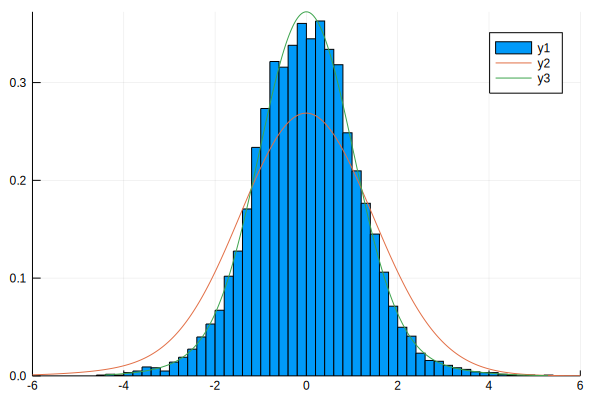

In [43]:
plot(hist.edges, dens, seriestype=:barbins)
plot!(marginal_grid, f_marg)
plot!(sort(Xs),f_m_rebayes)

In [6]:
R"library(REBayes)"

RCall.RObject{RCall.StrSxp}
[1] "REBayes"   "Matrix"    "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     


In [38]:
R"rebayes_fit <- GLmix(sort(prostz))"

RCall.RObject{RCall.VecSxp}

Call:
	NULL

Data:  ( obs.);	Bandwidth 'bw' = 

       x                y            
 Min.   :-4.408   Min.   : 0.000000  
 1st Qu.:-1.987   1st Qu.: 0.000000  
 Median : 0.434   Median : 0.000000  
 Mean   : 0.434   Mean   : 0.102922  
 3rd Qu.: 2.855   3rd Qu.: 0.000002  
 Max.   : 5.276   Max.   :21.613431  


In [39]:
R"g_prior <- rebayes_fit$y"
R"x_prior <- rebayes_fit$x"
R"f_m_rebayes <- rebayes_fit$g"
@rget g_prior
@rget x_prior;
@rget f_m_rebayes;

In [16]:
idx_pos = find(g_prior .> 0.001)

10-element Array{Int64,1}:
  64
  65
 131
 132
 133
 149
 150
 151
 220
 221

In [21]:
[x_prior[idx_pos] g_prior[idx_pos]*(x_prior[2]-x_prior[1])]

10×2 Array{Float64,2}:
 -2.36057   0.00389285
 -2.32807   0.0167936 
 -0.183387  9.95848e-5
 -0.150892  0.702334  
 -0.118396  5.67413e-5
  0.401528  4.99868e-5
  0.434023  0.144019  
  0.466518  0.118134  
  2.70869   0.0010207 
  2.74119   0.0134519 

In [36]:
mynpmle

EmpiricalBayes.NPMLE{Distributions.MixtureModel{Distributions.Univariate,Distributions.Continuous,Distributions.Normal}}([-3.48, -0.16, -0.12, 0.72, 0.76, 1.0, 1.04, 1.08], [0.0177043, 0.253684, 0.576737, 0.0357556, 0.0500709, 0.00322203, 0.0606242, 0.00220281], [-6.0, -5.96, -5.92, -5.88, -5.84, -5.8, -5.76, -5.72, -5.68, -5.64  …  5.64, 5.68, 5.72, 5.76, 5.8, 5.84, 5.88, 5.92, 5.96, 6.0], MixtureModel{Distributions.Normal}(K = 8)
components[1] (prior = 0.0177): Distributions.Normal{Float64}(μ=-3.48, σ=1.0)
components[2] (prior = 0.2537): Distributions.Normal{Float64}(μ=-0.16, σ=1.0)
components[3] (prior = 0.5767): Distributions.Normal{Float64}(μ=-0.12, σ=1.0)
components[4] (prior = 0.0358): Distributions.Normal{Float64}(μ=0.72, σ=1.0)
components[5] (prior = 0.0501): Distributions.Normal{Float64}(μ=0.76, σ=1.0)
components[6] (prior = 0.0032): Distributions.Normal{Float64}(μ=1.0, σ=1.0)
components[7] (prior = 0.0606): Distributions.Normal{Float64}(μ=1.04, σ=1.0)
components[8] (prior = 

In [19]:
sum(g_prior)*(x_prior[2]-x_prior[1])

0.9999999999773759